In [702]:
from random import random
import random as rnd

def factor(n):
    ans = []
    d = 2
    while d * d <= n:
        if n % d == 0:
            ans.append(d)
            n //= d
        else:
            d += 1
    if n > 1:
        ans.append(n)
    return ans


def is_prime(n):
    d = 2
    while n % d != 0:
        d += 1
    return d == n


def smallest_prime(factors):
    answer = None
    for factor in factors:
        if is_prime(factor) and (answer is None or answer <= factor):
            answer = factor
            
    return answer

def on_curve(p, a, b):
    if p is None:
        return True
    x = p[0]
    y = p[1]
    return (y ** 2) % M == (x ** 3 + a * x + b) % M 

In [704]:
M = 61
ab = []

def check(a, b):
    return (4 * a ** 3 + 27 * b ** 2) % M is not 0

for i in range (-M + 1, M):
    for j in range (-M + 1, M):
        if check(i, j):
            p = 1
            for x in range(M):
                for y in range(M):
                    if on_curve((x, y), i, j):
                        p += 1
            if is_prime(p):
                ab.append(((i, j), p))
print(len(ab))            
print(ab)

1820
[((-60, -52), 73), ((-60, -49), 71), ((-60, -42), 67), ((-60, -19), 67), ((-60, -12), 71), ((-60, -9), 73), ((-60, 9), 73), ((-60, 12), 71), ((-60, 19), 67), ((-60, 42), 67), ((-60, 49), 71), ((-60, 52), 73), ((-59, -56), 59), ((-59, -54), 61), ((-59, -43), 61), ((-59, -42), 47), ((-59, -19), 47), ((-59, -18), 61), ((-59, -7), 61), ((-59, -5), 59), ((-59, 5), 59), ((-59, 7), 61), ((-59, 18), 61), ((-59, 19), 47), ((-59, 42), 47), ((-59, 43), 61), ((-59, 54), 61), ((-59, 56), 59), ((-58, -58), 67), ((-58, -45), 67), ((-58, -44), 53), ((-58, -35), 67), ((-58, -26), 67), ((-58, -17), 53), ((-58, -16), 67), ((-58, -3), 67), ((-58, 3), 67), ((-58, 16), 67), ((-58, 17), 53), ((-58, 26), 67), ((-58, 35), 67), ((-58, 44), 53), ((-58, 45), 67), ((-58, 58), 67), ((-57, -60), 67), ((-57, -46), 67), ((-57, -35), 53), ((-57, -32), 67), ((-57, -29), 67), ((-57, -26), 53), ((-57, -15), 67), ((-57, -1), 67), ((-57, 1), 67), ((-57, 15), 67), ((-57, 26), 53), ((-57, 29), 67), ((-57, 32), 67), ((-57

In [690]:
def curve(a, b, x):
    return (x ** 3 + a * x + b) % M

def on_curve(p):
    if p is None:
        return True
    x = p[0]
    y = p[1]
    return (y ** 2) % M == (x ** 3 + a * x + b) % M 

In [692]:
#a, b = 49, 41
a, b = -47, 9
points = []

for x in range(M):
    for y in range(M):
        if on_curve((x, y)):
            points.append((x, y % M))
        
print(len(points))
print(points)

67
[(0, 3), (0, 58), (2, 17), (2, 44), (6, 2), (6, 59), (12, 21), (12, 40), (13, 3), (13, 58), (15, 19), (15, 42), (17, 6), (17, 55), (19, 27), (19, 34), (21, 29), (21, 32), (22, 30), (22, 31), (26, 25), (26, 36), (27, 1), (27, 60), (28, 24), (28, 37), (31, 10), (31, 51), (32, 23), (32, 38), (33, 28), (33, 33), (35, 8), (35, 53), (36, 4), (36, 57), (37, 1), (37, 60), (38, 5), (38, 56), (41, 5), (41, 56), (43, 5), (43, 56), (45, 9), (45, 52), (47, 27), (47, 34), (48, 3), (48, 58), (49, 2), (49, 59), (50, 7), (50, 54), (53, 19), (53, 42), (54, 19), (54, 42), (55, 21), (55, 40), (56, 27), (56, 34), (58, 1), (58, 60), (59, 20), (59, 41)]


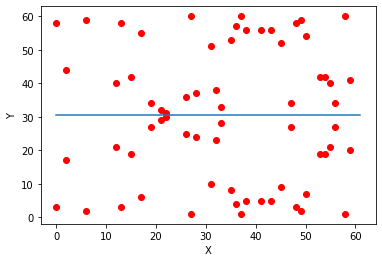

In [693]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_points(x, y):
    fig, ax = plt.subplots()
    plt.plot(x, y, 'ro')
    plt.plot([0, M], [M / 2, M / 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()
    
x = [point[0] for point in points]
y = [point[1] for point in points]
plot_points(x, y)

In [694]:
def extended_euclidean_algorithm(a, b):
    s, old_s = 0, 1
    t, old_t = 1, 0
    r, old_r = b, a

    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

    return old_r, old_s, old_t


def inverse_mod(n, p):
    gcd, x, y = extended_euclidean_algorithm(n, p)
    assert (n * x + p * y) % p == gcd

    if gcd != 1:
        # Или n равно 0, или p не является простым.
        raise ValueError(
            '{} has no multiplicative inverse '
            'modulo {}'.format(n, p))
    else:
        return x % p

In [695]:
def point_add(point1, point2):
    assert on_curve(point1)
    assert on_curve(point2)

    if point1 is None:
        # 0 + point2 = point2
        return point2
    if point2 is None:
        # point1 + 0 = point1
        return point1

    x1, y1 = point1
    x2, y2 = point2

    if x1 == x2 and y1 != y2:
        # point1 + (-point1) = 0
        return None

    if x1 == x2:
        # This is the case point1 == point2.
        m = (3 * x1 * x1 + a) * inverse_mod(2 * y1, M)
    else:
        # This is the case point1 != point2.
        m = (y1 - y2) * inverse_mod(x1 - x2, M)

    x3 = m * m - x1 - x2
    y3 = y1 + m * (x3 - x1)
    result = (x3 % M,
              -y3 % M)

    assert on_curve(result)

    return result

def point_neg(point):
    assert on_curve(point)

    if point is None:
        # -0 = 0
        return None

    x, y = point
    result = (x, -y % M)

    assert on_curve(result)

    return result


def scalar_mult(k, point):
    assert on_curve(point)

    if k % n == 0 or point is None:
        return None

    if k < 0:
        # k * point = -k * (-point)
        return scalar_mult(-k, point_neg(point))

    result = None
    addend = point

    while k:
        if k & 1:
            # Add.
            result = point_add(result, addend)

        # Double.
        addend = point_add(addend, addend)

        k >>= 1

    assert on_curve(result)

    return result

In [696]:
N = len(points) + 1
n = smallest_prime(factor(N))
h = int(N / n)
print(n)
print(h)
G = points[int(random() * N - 1)]
while scalar_mult(h, G) is None:
    G = points[int(random() * N) - 1]
    
G = scalar_mult(h, G)
print('M : {}, a : {}, b : {}, n : {}, h : {}, G: ({}, {})'.format(M, a, b, n, h, *G))

67
1
M : 61, a : -47, b : 9, n : 67, h : 1, G: (15, 19)


In [697]:
def make_keypair():
    private_key = rnd.randrange(1, n)
    public_key = scalar_mult(private_key, G)

    return private_key, public_key

In [698]:
# M, a, b, n, h, G are defined 

alice_private_key, alice_public_key = make_keypair()
print("Alice's private key: {}".format(alice_private_key))
print("Alice's public key: ({}, {})".format(*alice_public_key))

bob_private_key, bob_public_key = make_keypair()
print("Bob's private key: {}".format(bob_private_key))
print("Bob's public key: ({}, {})".format(*bob_public_key))

# Alice and Bob exchange their public keys and calculate the shared secret.
s1 = scalar_mult(alice_private_key, bob_public_key)
s2 = scalar_mult(bob_private_key, alice_public_key)
assert s1 == s2

print('Shared secret: ({}, {})'.format(*s1))

Alice's private key: 44
Alice's public key: (35, 8)
Bob's private key: 58
Bob's public key: (55, 21)
Shared secret: (49, 2)


In [699]:
import hashlib

def hash_message(message):
    message_hash = hashlib.sha512(message).digest()
    e = int.from_bytes(message_hash, 'big')

    # FIPS 180 says that when a hash needs to be truncated, the rightmost bits
    # should be discarded.
    z = e >> (e.bit_length() - n.bit_length())

    assert z.bit_length() <= n.bit_length()

    return z


def sign_message(private_key, message):
    z = hash_message(message)

    r = 0
    s = 0

    while not r or not s:
        k = rnd.randrange(2, n)
        x, y = scalar_mult(k, G)
        r = x % n
        s = (z + r * private_key) * inverse_mod(k, n) % n

    return (r, s)


def verify_signature(public_key, message, signature):
    z = hash_message(message)
    r, s = signature
    w = inverse_mod(s, n)
    u1 = (z * w) % n
    u2 = (r * w) % n
   
    x, y = point_add(scalar_mult(u1, G),
                     scalar_mult(u2, public_key))

   
    if (r % n) == (x % n):
        return 'signature matches'
    else:
        return 'invalid signature'

In [701]:
private, public = make_keypair()
print("Private key: {}".format(private))
print("Public key: ({}, {})".format(*public))

msg = b'Hello, this is my message!'
signature = sign_message(private, msg)

print()
print('Message:', msg)
print('Signature: ({}, {})'.format(*signature))
print('Verification:', verify_signature(public, msg, signature))

msg = b'Hi there. And this is my message!'
print()
print('Message:', msg)
print('Verification:', verify_signature(public, msg, signature))

private, public = make_keypair()

msg = b'Hello, this is my message!'
print()
print('Message:', msg)
print("Public key: ({}, {})".format(*public))
print('Verification:', verify_signature(public, msg, signature))

Private key: 46
Public key: (56, 27)

Message: b'Hello, this is my message!'
Signature: (6, 64)
Verification: signature matches

Message: b'Hi there. And this is my message!'
Verification: invalid signature

Message: b'Hello, this is my message!'
Public key: (27, 60)
Verification: invalid signature
